<a href="https://colab.research.google.com/github/Sandeep81299/Drug-prediction-Based-upon-review-and-conditions/blob/main/DrugReviewProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Drug Review Project**

Problem statement:
Pharmaceutical drug and review data is provided. Build a model to predict a drug name based on the review given. Also answer the given questions using the provided dataset. Use Python. During the interview, you are expected to share the python code (preferably Jupyter notebook) code containing your answers.

Dataset: The dataset under consideration consists of two primary components train and test. These are intended for use in a supervised machine learning (NLP) task.

The train dataset contains textual information that is related to review of the drug.

Columns:
1.	Unique Id – A unique identifier reference for each entry in the dataset
2.	Drug Name – This contains the name of the drug
3.	Condition – Gives the information about the patient condition
4.	Review – contains the review about the drug

The test dataset contains only information about the review which you can used for making inferences
Train the Model using train dataset and predict the result on test dataset. You can evaluate your final model based on the result provided in the ‘model_evaluation.csv’ where ground truth is given.



### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk  # You need to import NLTK
nltk.download('stopwords')
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import STOPWORDS



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Importing drive and csv files
from google.colab import drive
import warnings
warnings.filterwarnings("ignore") #This will ignore all DeprecationWarning warnings in your code.
# Mount Google Drive
drive.mount('/content/drive')
import pickle

Mounted at /content/drive


In [ ]:
#importing important libraries
import nltk
import string
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk import ngrams
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#Importing important libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, KFold

### Importing Dataset

In [ ]:
#Importing training dataset
data = pd.read_csv('/content/drive/MyDrive/train.csv')


In [ ]:
#Data first view
data

,uniqueID,drugName,condition,review
0,206461.0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati..."
1,95260.0,Guanfacine,ADHD,"""My son is halfway through his fourth week of ..."
2,92703.0,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh..."
3,138000.0,Ortho Evra,Birth Control,"""This is my first time using any form of birth..."
4,35696.0,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around..."
...,...,...,...,...
161291,NaN,NaN,NaN,NaN
161292,NaN,NaN,NaN,NaN
161293,NaN,NaN,NaN,NaN
161294,NaN,NaN,NaN,NaN


### Data Preprocessing and Visualisations

In [ ]:
 # shape of data
 data.shape

(161296, 4)

In [ ]:
#info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161296 entries, 0 to 161295
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   uniqueID   1993 non-null   float64
 1   drugName   1999 non-null   object 
 2   condition  1988 non-null   object 
 3   review     1991 non-null   object 
dtypes: float64(1), object(3)
memory usage: 4.9+ MB


In [ ]:
#first five rows
data.head(5)

,uniqueID,drugName,condition,review
0,206461.0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati..."
1,95260.0,Guanfacine,ADHD,"""My son is halfway through his fourth week of ..."
2,92703.0,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh..."
3,138000.0,Ortho Evra,Birth Control,"""This is my first time using any form of birth..."
4,35696.0,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around..."


In [ ]:
#last five rows
data.tail(5)

,uniqueID,drugName,condition,review
161291,NaN,NaN,NaN,NaN
161292,NaN,NaN,NaN,NaN
161293,NaN,NaN,NaN,NaN
161294,NaN,NaN,NaN,NaN
161295,NaN,NaN,NaN,NaN


In [ ]:
#null values in data
data.isnull().sum()

uniqueID     159303
drugName     159297
condition    159308
review       159305
dtype: int64

In [ ]:
# Dropped uniqueID
df = data.drop(['uniqueID'],axis=1)

In [ ]:
# Data view
df

,drugName,condition,review
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati..."
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ..."
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth..."
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around..."
...,...,...,...
161291,NaN,NaN,NaN
161292,NaN,NaN,NaN
161293,NaN,NaN,NaN
161294,NaN,NaN,NaN


In [ ]:
#Handling null values
df=df.dropna()
df

,drugName,condition,review
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati..."
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ..."
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth..."
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around..."
...,...,...,...
1994,Levonorgestrel,Abnormal Uterine Bleeding,"""Tried pill form birth control for a few years..."
1995,Venlafaxine,Depression,"""My doctor prescribed 37.5 mg to me. I took o..."
1996,FreshKote,Eye Redness,"""This is the first prescription eye drops that..."
1997,Effexor XR,Depression,"""Effexor has been the most effective antidepre..."


In [ ]:
#Distribution of data
df.condition.value_counts()

Birth Control                              352
Depression                                 139
Pain                                        86
Acne                                        72
Anxiety                                     67
                                          ... 
Clostridial Infection                        1
Spondyloarthritis                            1
High Cholesterol, Familial Heterozygous      1
Night Terrors                                1
Warts                                        1
Name: condition, Length: 264, dtype: int64

### Visualisation

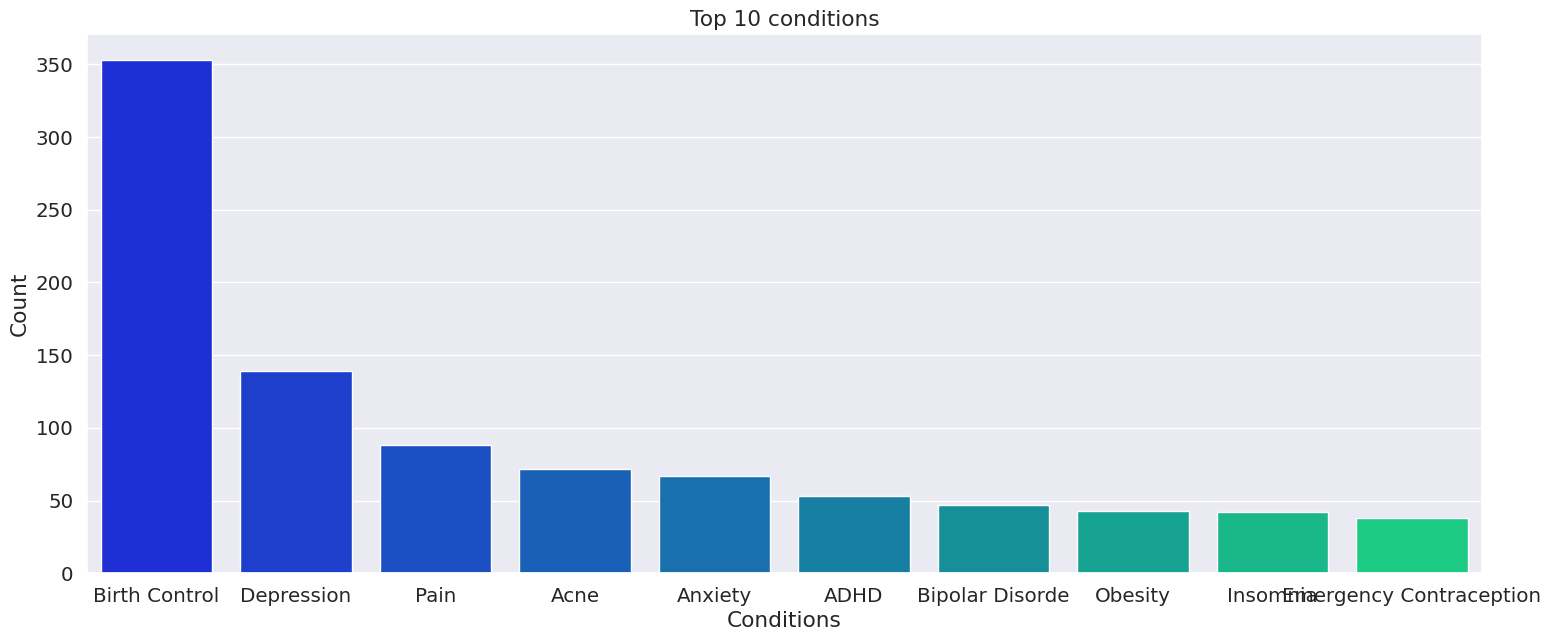

In [ ]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

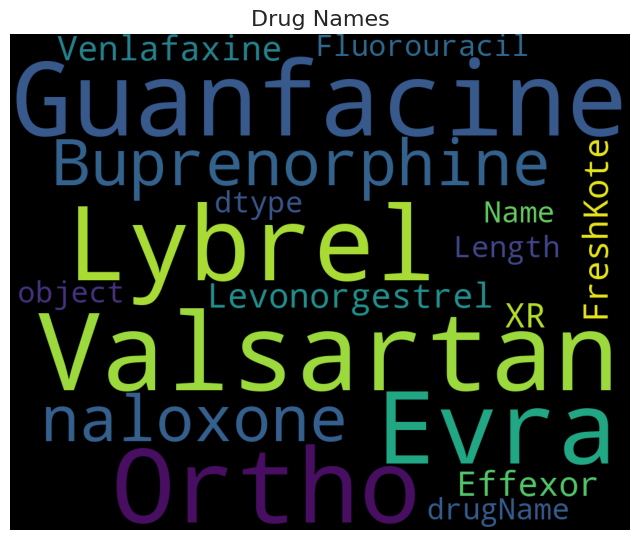

In [ ]:
#Visualization of drug names
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, width = 1000, height = 800).generate(str(df['drugName']))
plt.rcParams['figure.figsize'] = (8, 10)
plt.title('Drug Names', fontsize = 16)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

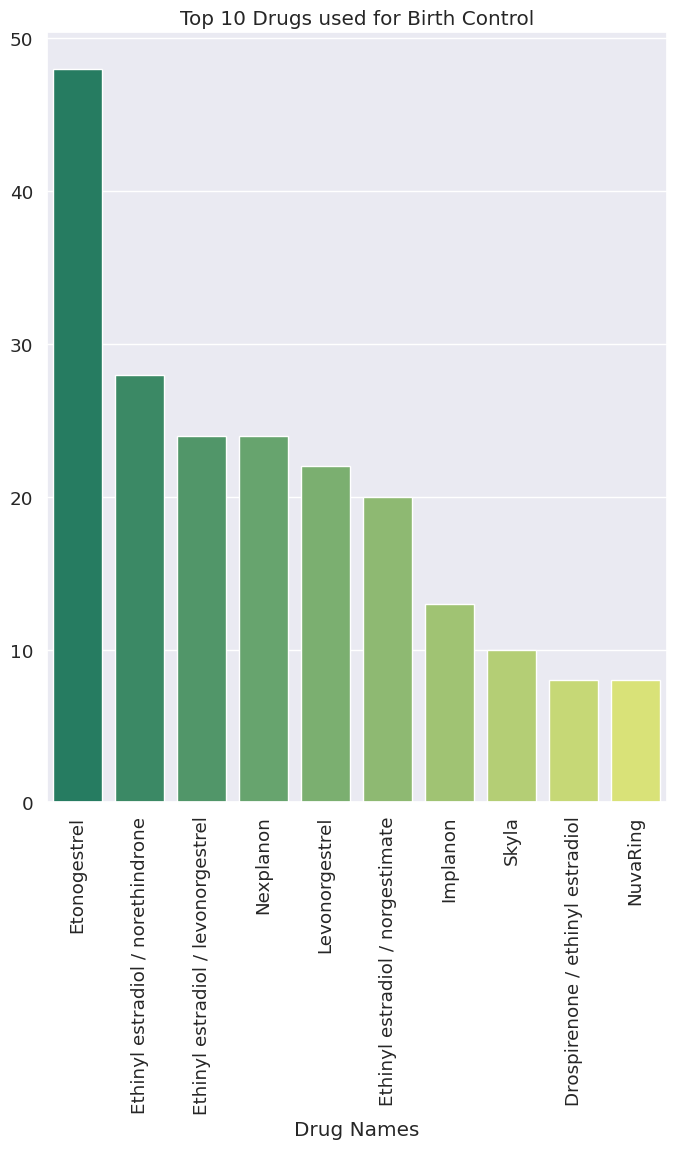

In [ ]:
# Top 10 Drugs used for birth control
df1 = data[data['condition'] == 'Birth Control']['drugName'].value_counts()[0:10]
sns.set(font_scale=1.2, style='darkgrid')
sns_ = sns.barplot(x=df1.index, y=df1.values, palette='summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.xticks(rotation=90)

plt.show()


In [ ]:
#dataset view
data

,uniqueID,drugName,condition,review
0,206461.0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati..."
1,95260.0,Guanfacine,ADHD,"""My son is halfway through his fourth week of ..."
2,92703.0,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh..."
3,138000.0,Ortho Evra,Birth Control,"""This is my first time using any form of birth..."
4,35696.0,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around..."
...,...,...,...,...
161291,NaN,NaN,NaN,NaN
161292,NaN,NaN,NaN,NaN
161293,NaN,NaN,NaN,NaN
161294,NaN,NaN,NaN,NaN


In [ ]:
#Data cleaning
def clean_data(review):
    # changing to lower case
    lower = review.str.lower()

    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")

    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')

    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')

    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')

    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')

    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')

    return dataframe

In [ ]:
#creating a new data
df['new_review'] = clean_data(df['review'])
df['drugName'] = clean_data(df['drugName'])

In [ ]:
from nltk.corpus import stopwords

# Initialize the set of stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from the 'new_review' column
df['new_review'] = df['new_review'].apply(lambda text: ' '.join(word for word in text.split() if word not in stop_words))

In [ ]:
df

,drugName,condition,review,new_review
0,valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",side effect take combination bystolic 5 mg fis...
1,guanfacine,ADHD,"""My son is halfway through his fourth week of ...",son halfway fourth week intuniv became concern...
2,lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",used take another oral contraceptive 21 pill c...
3,ortho evra,Birth Control,"""This is my first time using any form of birth...",first time using form birth control im glad we...
4,buprenorphine naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",suboxone completely turned life around feel he...
...,...,...,...,...
1994,levonorgestrel,Abnormal Uterine Bleeding,"""Tried pill form birth control for a few years...",tried pill form birth control years getting ca...
1995,venlafaxine,Depression,"""My doctor prescribed 37.5 mg to me. I took o...",doctor prescribed 37 5 mg took one 3 00p 7 00p...
1996,freshkote,Eye Redness,"""This is the first prescription eye drops that...",first prescription eye drops worked wonders se...
1997,effexor xr,Depression,"""Effexor has been the most effective antidepre...",effexor effective antidepressant ive tried 5 s...


In [ ]:
#lemmatizer
lm = WordNetLemmatizer()

In [ ]:
df['new_review'] = df['new_review'].apply(lambda x : " ".join(lm.lemmatize(word) for word in x.split()))
df['condition'] = df['condition'].apply(lambda x : " ".join(lm.lemmatize(word) for word in x.split()))

In [ ]:
df

,drugName,condition,review,new_review
0,valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",side effect take combination bystolic 5 mg fis...
1,guanfacine,ADHD,"""My son is halfway through his fourth week of ...",son halfway fourth week intuniv became concern...
2,lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",used take another oral contraceptive 21 pill c...
3,ortho evra,Birth Control,"""This is my first time using any form of birth...",first time using form birth control im glad we...
4,buprenorphine naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",suboxone completely turned life around feel he...
...,...,...,...,...
1994,levonorgestrel,Abnormal Uterine Bleeding,"""Tried pill form birth control for a few years...",tried pill form birth control year getting cau...
1995,venlafaxine,Depression,"""My doctor prescribed 37.5 mg to me. I took o...",doctor prescribed 37 5 mg took one 3 00p 7 00p...
1996,freshkote,Eye Redness,"""This is the first prescription eye drops that...",first prescription eye drop worked wonder seve...
1997,effexor xr,Depression,"""Effexor has been the most effective antidepre...",effexor effective antidepressant ive tried 5 s...


In [ ]:

df['info'] = df['condition'] + ' ' +df['new_review']
df['info'] = df['info'].str.lower()


In [ ]:
df

,drugName,condition,review,new_review,info
0,valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",side effect take combination bystolic 5 mg fis...,left ventricular dysfunction side effect take ...
1,guanfacine,ADHD,"""My son is halfway through his fourth week of ...",son halfway fourth week intuniv became concern...,adhd son halfway fourth week intuniv became co...
2,lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",used take another oral contraceptive 21 pill c...,birth control used take another oral contracep...
3,ortho evra,Birth Control,"""This is my first time using any form of birth...",first time using form birth control im glad we...,birth control first time using form birth cont...
4,buprenorphine naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",suboxone completely turned life around feel he...,opiate dependence suboxone completely turned l...
...,...,...,...,...,...
1994,levonorgestrel,Abnormal Uterine Bleeding,"""Tried pill form birth control for a few years...",tried pill form birth control year getting cau...,abnormal uterine bleeding tried pill form birt...
1995,venlafaxine,Depression,"""My doctor prescribed 37.5 mg to me. I took o...",doctor prescribed 37 5 mg took one 3 00p 7 00p...,depression doctor prescribed 37 5 mg took one ...
1996,freshkote,Eye Redness,"""This is the first prescription eye drops that...",first prescription eye drop worked wonder seve...,eye redness first prescription eye drop worked...
1997,effexor xr,Depression,"""Effexor has been the most effective antidepre...",effexor effective antidepressant ive tried 5 s...,depression effexor effective antidepressant iv...


In [ ]:
new_df = df.drop(['review','condition','new_review'],axis=1)

In [ ]:
new_df

,drugName,info
0,valsartan,left ventricular dysfunction side effect take ...
1,guanfacine,adhd son halfway fourth week intuniv became co...
2,lybrel,birth control used take another oral contracep...
3,ortho evra,birth control first time using form birth cont...
4,buprenorphine naloxone,opiate dependence suboxone completely turned l...
...,...,...
1994,levonorgestrel,abnormal uterine bleeding tried pill form birt...
1995,venlafaxine,depression doctor prescribed 37 5 mg took one ...
1996,freshkote,eye redness first prescription eye drop worked...
1997,effexor xr,depression effexor effective antidepressant iv...


#Label Encoding

In [ ]:

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
y_train = label_encoder.fit_transform(new_df['drugName'])

# Print the original data and the encoded data
print("Encoded data:", y_train)


Encoded data: [658 282 375 ... 269 206 262]


# Applying TF-IDF Vectorizer

In [ ]:
tf_vectorizer = TfidfVectorizer(stop_words='english')
x_train = tf_vectorizer.fit_transform(new_df['info'])


In [ ]:
print(x_train.shape)


(1981, 7241)


In [ ]:

X_train, X_test, Y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

### Random Forest Classifier

In [ ]:

# Initialize the RandomForestClassifier with example parameters
model_mt = RandomForestClassifier(
    n_estimators=100,      # Number of trees in the forest
    max_depth=None,         # Maximum depth of each tree (None means nodes are expanded until min_samples_split)
    min_samples_split=10,   # Minimum samples required to split a node
    min_samples_leaf=1,    # Minimum samples required to be a leaf node
    max_features='auto',   # Number of features to consider for the best split ('auto' is sqrt(n_features))
    criterion='gini',      # Split quality criterion ('gini' or 'entropy')
    class_weight=None,     # Set to 'balanced' for imbalanced classes
    random_state=42,       # Random seed for reproducibility
    n_jobs=-1,             # Use all available CPU cores for training
    bootstrap=True,        # Use bootstrapping for building trees
    oob_score=False,       # Compute out-of-bag error estimate
    verbose=0              # Control the amount of information printed during training
)

# Train the RandomForestClassifier on your NLP data
model_mt.fit(X_train ,Y_train)

# Make predictions on test data
y_pred_mt = model_mt.predict(X_test)


In [ ]:
#print(confusion_matrix(y_pred_mt,y_test))

from sklearn.metrics import accuracy_score

# Assuming you have already trained and fitted your MultinomialNB classifier
# X_test is your test data, y_test are the true labels, and nb_classifier is your MultinomialNB model
predicted_labels = model_mt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_mt)

print("Accuracy:", accuracy)


Accuracy: 0.2216624685138539


In [ ]:
# Calculate precision and recall with 'macro' averaging
precision = precision_score(y_test, y_pred_mt, average='macro')
recall = recall_score(y_test, y_pred_mt, average='macro')

# Or use 'micro' or 'weighted' averaging, as needed
precision_micro = precision_score(y_test, y_pred_mt, average='micro')
precision_weighted = precision_score(y_test, y_pred_mt, average='weighted')

print("precision= ", precision)
print("recall= ", recall)
print("precision_micro = ",precision_micro)
print("precision_weighted = ",precision_weighted)



precision=  0.08082676298060915
recall=  0.1237948717948718
precision_micro =  0.2216624685138539
precision_weighted =  0.16001618029325837


#k-fold cross-validation

In [ ]:
# Create a RandomForestClassifier instance with example hyperparameters
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='auto',
    criterion='gini',
    class_weight=None,
    random_state=42,
    n_jobs=-1,
    bootstrap=True,
    oob_score=False,
    verbose=0
)

# Specify the number of folds for cross-validation (e.g., 5 or 10)
num_folds = 5

# Create a KFold object for cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy scores
scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Calculate the mean and standard deviation of the accuracy scores
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print("Mean accuracy:", mean_accuracy)
print("Standard deviation of accuracy:", std_accuracy)

Accuracy scores for each fold: [0.20189274 0.18927445 0.17665615 0.170347   0.20253165]
Mean accuracy: 0.18814039851455497
Standard deviation of accuracy: 0.0130077971173894


# Logistic Regression

In [ ]:
# Create and train your logistic regression model with max_iter set to 1000
model_lt = LogisticRegression(penalty=None, solver='saga', max_iter=1000)
model_lt.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_lt = model_lt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lt)
print("Accuracy:", accuracy)

# Calculate precision (with 'weighted' averaging)
precision = precision_score(y_test, y_pred_lt, average='weighted', zero_division=0)
print("Precision:", precision)

# Calculate recall (with 'weighted' averaging)
recall = recall_score(y_test, y_pred_lt, average='weighted', zero_division=0)
print("Recall:", recall)

# Calculate F1 score (with 'weighted' averaging)
f1 = f1_score(y_test, y_pred_lt, average='weighted')
print("F1 Score:", f1)

# Create and print a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lt)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.20654911838790932
Precision: 0.15558925837337453
Recall: 0.20654911838790932
F1 Score: 0.15977107393321102
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#Predicting results

In [ ]:
# Function for text preprocessing
def transform(text):
    # Initialize Lemmatizer
    lm = WordNetLemmatizer()

    # Lowercase the text
    text = text.lower()

    # Tokenize the text
    text = nltk.word_tokenize(text)

    # Filter out non-alphanumeric tokens
    y = [i for i in text if i.isalnum()]

    # Remove stopwords and punctuation
    y = [i for i in y if i not in stopwords.words('english') and i not in string.punctuation]

    # Lemmatize the remaining tokens
    y = [lm.lemmatize(i) for i in y]

    return " ".join(y)

# Function for recommendation
def recommend(review):
    text = transform(review)
    l = [text]
    text = tf_vectorizer.transform(l)
    pred = model_mt.predict(text)
    decoded_data = label_encoder.inverse_transform(pred)

    # Return the decoded recommendation
    return decoded_data[0]


In [ ]:
review="""Contrave combines drugs that were used for alcohol, smoking, and opioid cessation. People lose weight on it because it also helps control over-eating. I have no doubt that most obesity is caused from sugar/carb addiction, which is just as powerful as any drug. I have been taking it for five days, and the good news is, it seems to go to work immediately. I feel hungry before I want food now. I really don&#039;t care to eat; it&#039;s just to fill my stomach. Since I have only been on it a few day"""
recommend(review)

'contrave'

In [ ]:
review="""This is my third time on vesicare. After seeing several doctors with symptoms of UTIs and having pathology determine there was no infection I was diagnosed with urethral syndrome. I usually take 5mg per day and the condition clears up within a week and I can stop the medication. No more tenderness, spasms or urgency. Some dry mouth, but that&#039;s easily solved."""
recommend(review)

'vesicare'

In [ ]:
review="""I smoked for 50+ years.  Took it for one week and that was it.  I didn&#039;t think it was possible for me to quit.  It has been 6 years now.  Great product."""
recommend(review)

'varenicline'

In [ ]:
review="""This medication helped me  sleep, but eventually it became ineffective as a sleep aid. It also helps me calm down when in severe stress, anxiety, or panic."""
recommend(review)

'alprazolam'

In [ ]:
drug_prediction=pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
evaluation=pd.read_excel('/content/drive/MyDrive/Drug_assigbment/model_evaluation.xlsx')

In [ ]:
drug_prediction['review'][20]


'"If I could give it a 0, I would absolutely do so.  Started at 50mg, and felt WIRED.  Wanted to get up and clean the house!  Bumped it to 100mg, less wired, but still wide awake all night.  Bumped to 150, with the same lack of effect.  MD informed me after this dose it becomes less effective for sleep, so why even bother.  15 years of trying different sleep medications and alternatives, and this, I can say for sure, was the LEAST effective I have ever come across.  At it&#039;s low price point, feel free to give it a try, and maybe you will be luckier?  Everyone&#039;s sleep conditions are different.  But if you get hyper after benadryl, expect the same reaction to this drug."'

In [ ]:
evaluation['drugName'][20]

'Trazodone'

In [ ]:
 recommend(drug_prediction['review'][20])

'unisom sleepgels'

### Exporting model with pickle

In [ ]:
# Save the File
filename = 'regression_model.sav'
pickle.dump(model_lt, open(filename, 'wb'))

# load the model
load_model = pickle.load(open(filename, 'rb'))


In [ ]:
# Load the File and predict unseen data.
y_pred = load_model.predict(X_test)
print(y_pred)

[342 355 235 342 238 130 143 356 450 143 600 191  35 288 238 383  35 184
 373 600 151 544 637 133 383  29 383  90 675 324   5 629 307 701 342  26
  90  90 232 701 639 232 342 377   9 665 331 177 232 191 234 238  24 263
 582 679 255 394 227 238  89  25 405 232 177 645 587 191 405 405 665 701
 571 402 288 437 502 521 238 308  91 255 227 238 377   8  66 324  35  57
 151 485 238 238  62 232 342 224 133 123 396 665 234  90  80 168 424 364
 238 459 245  89 271 288 123  62   3 449 238  35 232 355 224 401 342 232
 502 424 238  90 191 123 452 123 271 191 271  16 211 396  88 357 143 502
 278 324 238 271 271 124 168 405 635 342  62 352 632 446  29 355 673 418
 177  12 234 191 191 534 232 234 522  62 342 544 331 196 199  35 331 675
 133  32 665 238 423 355 295  91 342 629 607  29 458 668 342 271 600 238
 234 610  24 227 175 238 352 238 263 521 665 271 668 263 455 445 582 191
 342  66 571 335 123 352  91 610 355  35 191 399 238 675 449 516 227 352
 544 235 271 701 224 151 296 610   3 404 582 326 70

#**Q1): What preprocessing steps would you perform on the train dataset before using it for modelling.**

In preparing the train dataset for modeling drug recommendations, several crucial preprocessing steps were undertaken. These steps are essential for enhancing the quality and suitability of the text data for subsequent analysis. Here's an overview of the data preparation process:

1. **Lowercasing:** One of the fundamental steps involved converting all text data to lowercase. This uniform casing ensures consistency throughout the dataset and simplifies the subsequent analysis.

2. **Special Character Removal:** The removal of special characters was accomplished through the utilization of regular expressions. This step is pivotal as it rids the text data of characters that often hold no meaningful information, consequently minimizing noise in the analysis.

3. **Non-ASCII Character Removal:** Eliminating non-ASCII characters was another integral part of data cleaning. This process guarantees that the text data consists solely of standard ASCII characters, rendering it more suitable for analysis and modeling.

4. **Whitespace Trimming:** Leading and trailing whitespaces were meticulously removed from the text. This action standardizes the text and safeguards against unwanted spaces interfering with the analysis.

5. **Multiple Whitespace Removal:** Multiple consecutive spaces were replaced with a single space. This maintenance of text readability and consistency ensures that issues arising from varying numbers of spaces in the data are effectively mitigated.

6. **Dot Reduction:** Sequences of two or more dots were replaced with a single space. This operation is especially valuable in text cleaning, particularly when multiple dots don't convey significant meaning within the context.

7. **Lemmatization:** The dataset underwent lemmatization, a valuable process in text preprocessing. Lemmatization reduces words to their base or dictionary form, resulting in the grouping of similar words and a reduction in the dimensionality of the text data.

8. **Combining Columns:** A significant step involved the consolidation of the "Review" and "Condition" columns. Merging these relevant columns is a powerful technique, particularly when it is believed that the information in these columns is interrelated and should be considered collectively.

Furthermore, the dataset was optimized by eliminating the "Unique Id" column, which was deemed unnecessary for drug recommendation. Additionally, any entries with missing values (NaN) were excluded from the dataset. These common preprocessing practices are essential in streamlining the data, ensuring its quality, and establishing a solid foundation for the development of precise and effective machine learning models.

#**Q2) Are there any missing values in the dataset? If yes, what is the nature of missing values and how might this affect model performance. What are some techniques to mitigate this issue.**


Yes, there are missing values in the dataset. The missing values are represented as "NaN" (Not a Number) in the dataset. Approximately 2000 rows contain valid values, while the rest have missing values, making it a significant proportion of the dataset.


The nature of missing values can vary, and it's essential to understand the reasons behind their absence. In this dataset, the missing values may be due to various factors, such as incomplete data collection, user reviews that didn't provide information, or errors in data entry.



The presence of missing values can significantly impact model performance in the following ways:

1. **Data Sparsity:** Missing values lead to data sparsity, making it challenging for machine learning models to learn meaningful patterns from the data. Sparse data may result in reduced model accuracy and reliability.

2. **Biased Representations:** If the missing values are not missing completely at random (MCAR), they can introduce bias into the dataset, potentially leading to inaccurate model predictions. The model may make decisions based on the available data, which may not be representative of the entire population.

3. **Reduced Sample Size:** Removing rows with missing values, as you've done, reduces the effective sample size, potentially leading to loss of valuable information and reducing the model's ability to generalize.


To mitigate the issue of missing values in the dataset, several techniques can be employed:

1. **Data Imputation:** Imputation involves filling in missing values with estimated or calculated values. Common imputation methods include using the mean, median, or mode for numerical features or using a specific category for categorical features.

2. **Advanced Imputation:** More advanced imputation techniques, such as regression imputation or using machine learning models to predict missing values, can be applied when the missing data is related to other features in the dataset.

3. **Deletion:** If the missing values are limited in number and dropping rows with missing values won't significantly reduce the dataset's size, deletion is an option. However, this should be done cautiously, as it may lead to a loss of valuable information.

4. **Data Augmentation:** In some cases, you may augment the dataset by incorporating external data sources or using data synthesis techniques to replace missing values.

5. **Missing Data Indicators:** Create binary indicator variables to signify the presence of missing values. This approach allows the model to consider the missingness as an informative feature.

6. **Multiple Imputations:** For complex datasets, multiple imputation techniques can be employed to generate several imputed datasets, which can help in understanding the uncertainty associated with missing data.

7. **Domain Knowledge:** Utilize domain knowledge and subject matter expertise to make informed decisions about handling missing data. This can involve creating specific rules for imputation or interpretation.



#**Q3) Do you see any potential features in the review column that could be useful for predicting the drug name and condition.**

Certainly, let's analyze the provided reviews and identify potential features in the "Review" column that could be useful for predicting the drug name and condition, particularly for alcohol, smoking, and opioid cessation:

1. **Keywords and Phrases:** The reviews contain several keywords and phrases that could be indicative of specific drug names and conditions. For example:
   - "contrave" may refer to the drug Contrave, used for weight loss and alcohol, smoking, and opioid cessation.
   - "birth control" may relate to contraceptives.
   - "methadone" and "withdrawal" suggest opioid cessation.
   - "ciprofloxacin" refers to an antibiotic.
   - "modafinil" indicates the use of the drug Modafinil for various purposes.
   - "smoking" and "quit" are related to smoking cessation.

2. **Side Effects and Symptoms:** The reviews often mention side effects, such as "nausea," "headaches," "dry mouth," and "insomnia." These symptoms can be linked to specific drugs and conditions.

3. **Personal Experiences:** Users share their experiences, such as improvements or worsening of symptoms. For instance, "feel better," "relief," "better person," "clear skin," "depression," "cramps," and "anxiety" may be associated with certain drug names and conditions.

4. **Temporal References:** Some reviews include a time frame of usage ("2 weeks," "5 days," "3 months") or a reference to their past experiences, which can help identify the duration and progress of the treatment.

5. **Specific Medication Names:** Specific drug names like "NuvaRing," "Campral," "Egrifta," "Modafinil," "Wellbutrin," "Brisdelle," and "Methadone" are mentioned directly and can be used for prediction.

6. **Numerical Data:** The inclusion of numerical data, like "50+ years," "10mg," "30mg," and "1800mg," may relate to dosage or duration of use and can be linked to specific drugs.

7. **User Feedback:** User ratings or assessments such as "9 out of 10" or "70%" can provide insights into users' satisfaction or effectiveness of specific medications.

**Prediction of Drug Names and Conditions:**

To predict the drug name and condition based on these features, natural language processing (NLP) techniques can be employed. This involves text analysis, tokenization, and creating a model that recognizes keywords, phrases, and patterns associated with specific drugs and conditions. Additionally, machine learning models, such as text classification, can be trained on labeled data to predict the drug name and condition from text reviews.

However, it's important to note that the accuracy of predictions will depend on the quality and quantity of labeled training data and the complexity of the model used. Therefore, developing and fine-tuning such a model would be a data-intensive task.

In practice, utilizing domain-specific datasets and expertise in pharmaceuticals and medical conditions would enhance the accuracy of predictions.

#**Q4) Can you provide some statistics and visualizations to summarize the distribution of categories (drug name)**

1. Word Cloud for Drug Names:

The word cloud provides a visual representation of the most frequently mentioned drug names in the dataset. The size of each drug name in the word cloud corresponds to its frequency of occurrence.
This visualization helps identify the most commonly reviewed drugs.
2. Top 10 Conditions:

The bar plot displays the top 10 medical conditions reported in the dataset. It shows the frequency of each condition based on user reviews.
This visualization highlights the most prevalent health conditions among the reviews.

3. Top 10 Drugs for Birth Control:

The bar plot reveals the top 10 drug names used for birth control, based on their frequency in user reviews.
This visualization gives a clear view of the most frequently mentioned drugs for contraception.
These visualizations a

#**Q5) Are there classes which are underrepresented or overrepresented? How might this skew the model’s prediction.**

Classes that are Overrepresented:

Etonogestrel, Levonorgestrel, and several other drugs have a relatively high number of reviews (48 and 42, respectively). These drugs are overrepresented in the dataset. Conditions such as Birth Control and Depression are also overrepresented, with 352 and 139 reviews, respectively.
Classes that are Underrepresented:

On the other hand, many drugs have a lower number of reviews, such as Spondyloarthritis, High Cholesterol, Familial Heterozygous, Night Terrors, and Warts, which each have only one review. These drugs and conditions are underrepresented in the dataset.
Impact on Model Predictions:

The overrepresentation of certain drugs and conditions can skew the model's predictions in favor of these popular classes. The model may perform well for frequently reviewed drugs and conditions but might have limited data and potentially lower prediction accuracy for drugs and conditions with very few reviews.
Mitigating Skew:

To mitigate this skew and ensure the model's predictions are reliable for both overrepresented and underrepresented classes, it's essential to address class imbalance in the dataset. Techniques such as oversampling underrepresented classes or using advanced machine learning models that handle imbalanced data can help improve predictions for less common drugs and conditions.

#**Q6) What are some techniques that can be used to address this? Does the model performance improve after incorporating such strategies.**


1. **Oversampling and Undersampling:**
   - Oversampling involves increasing the number of instances in the underrepresented class, whereas undersampling involves reducing the number of instances in the overrepresented class. These techniques help balance the class distribution and provide more equal representation for all classes.

2. **Synthetic Data Generation:**
   - Synthetic data generation techniques, such as SMOTE (Synthetic Minority Over-sampling Technique), can be employed to create synthetic data points for the underrepresented class, thereby balancing the dataset and improving the model's ability to learn from minority class samples.

3. **Cost-Sensitive Learning:**
   - Cost-sensitive learning assigns different misclassification costs to different classes, encouraging the model to focus more on the underrepresented classes during the training process. This ensures that the model pays more attention to the minority class, thus improving overall performance.

4. **Ensemble Methods:**
   - Ensemble methods, such as boosting and bagging, can be used to combine multiple models, giving more weight to the underrepresented class and improving the overall prediction accuracy. Techniques like AdaBoost and Random Forest are commonly used in this context.

5. **Data Augmentation:**
   - Data augmentation techniques, such as adding noise or introducing slight variations to existing data, can help create more diverse samples for the underrepresented classes. This enables the model to learn from a more comprehensive set of data, leading to better generalization and improved performance.

6. **Algorithm Selection:**
   - Choosing algorithms that are inherently robust to class imbalance, such as support vector machines with class weights or decision trees, can also contribute to improved model performance. Certain algorithms are designed to handle imbalanced data more effectively than others.

7. **Evaluation Metrics:**
   - Using appropriate evaluation metrics such as precision, recall, F1-score, and area under the ROC curve (AUC) can provide a more comprehensive assessment of the model's performance, especially when dealing with imbalanced data. These metrics offer a better understanding of how the model performs for both majority and minority classes.


#**Q7) What Modelling strategy would you consider for predicting the drug name from the dataset and why.**




1. **Logistic Regression:**
   - **Why Consider It:** Logistic regression is a widely used method for binary classification tasks, where you have two classes or outcomes. In this case, it can be used for binary drug name prediction, such as predicting whether a review corresponds to a specific drug (1) or not (0).
   - **Advantages:** Logistic regression is simple, interpretable, and computationally efficient. It provides probabilities of class membership, which can be useful for ranking or scoring predictions.
   - **When to Choose It:** Logistic regression is a good choice when you have a binary classification problem, and you want to understand the importance of individual features. It can serve as a baseline model for benchmarking more complex models.

2. **Random Forest Regression:**
   - **Why Consider It:** Random forest is an ensemble method that can be used for both classification and regression tasks. It's particularly useful when you have multiple classes (drug names in this case) and you want to make predictions based on a combination of features.
   - **Advantages:** Random forest is robust, handles non-linearity well, and can deal with imbalanced datasets. It can capture complex interactions between features and provide feature importance rankings.
   - **When to Choose It:** Random forest is a suitable choice when you have a multi-class classification problem with a dataset that contains many features or when you suspect that complex relationships exist between the features and the target variable.

Which one to choose ultimately depends on your specific goals and the nature of your dataset:

- If  goal is binary classification (predicting whether a review corresponds to a specific drug or not), logistic regression may be a straightforward and interpretable choice.

- If  goal is multi-class classification (predicting the drug name from multiple options), random forest regression can handle this and may capture complex patterns in the data.

.

#**Q8) How can we assess model robustness (Cross Validation Strategies).**

To assess the robustness of drug prediction model, we can employ various cross-validation strategies. Cross-validation helps evaluate how well your model generalizes to unseen data and provides insights into its stability and performance. Here are a few cross-validation techniques you can use for drug prediction:

1. **k-Fold Cross-Validation:**
   - **Description:** In k-fold cross-validation, the dataset is divided into k equally sized subsets or folds. The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, each time using a different fold as the test set.
   - **Advantages:** It provides a good balance between model training and testing, helping you assess generalization performance.
   - **Use Case:** Use k-fold cross-validation when you have a moderate-sized dataset, and you want to get a robust estimate of your model's performance.

2. **Stratified k-Fold Cross-Validation:**
   - **Description:** This is similar to k-fold cross-validation, but it ensures that each fold has a similar class distribution to the original dataset. This is essential when dealing with imbalanced datasets, where certain drug classes might be underrepresented.
   - **Advantages:** It ensures that each class is fairly represented in both training and testing sets, making it suitable for imbalanced datasets.
   - **Use Case:** When your dataset has class imbalances (certain drugs are underrepresented), stratified k-fold cross-validation is a good choice.

3. **Leave-One-Out Cross-Validation (LOOCV):**
   - **Description:** LOOCV is a special case of k-fold cross-validation where k is set to the number of data points. It trains the model on all data points except one, which is used for testing. This process is repeated for each data point.
   - **Advantages:** It maximizes the use of data for training and provides an almost unbiased estimate of model performance.
   - **Use Case:** LOOCV can be useful when you have a small dataset, although it can be computationally expensive for large datasets.

4. **Time Series Cross-Validation:**
   - **Description:** Time series data, where the sequence of events matters (e.g., drug reviews over time), requires specialized cross-validation. You can use techniques like rolling-window cross-validation or expanding window cross-validation to ensure the model's ability to predict future drug reviews.
   - **Advantages:** It reflects the temporal nature of the data and is essential for time-dependent drug predictions.
   - **Use Case:** When your dataset contains a time component, time series cross-validation is necessary.

5. **Nested Cross-Validation:**
   - **Description:** Nested cross-validation involves having an inner loop for hyperparameter tuning and an outer loop for performance estimation. This helps you optimize your model's hyperparameters and obtain an unbiased estimate of its performance.
   - **Advantages:** It prevents overfitting hyperparameters to a specific dataset and provides a more realistic view of how the model will perform on new data.
   - **Use Case:** When you need to fine-tune hyperparameters, nested cross-validation is essential.

6. **Bootstrapped Cross-Validation:**
   - **Description:** Bootstrapped cross-validation involves repeatedly resampling your dataset with replacement to create multiple train-test splits. This technique helps assess model stability by estimating variability in model performance.
   - **Advantages:** It can provide insights into how sensitive your model is to different subsets of the data.
   - **Use Case:** When you want to assess model stability and the impact of data variability.



#**Q9) What evaluation metrics would you use to assess the performance of your model.**

To assess the performance of your drug prediction model, you should use a combination of evaluation metrics that are appropriate for the multi-class classification problem. Here are some key evaluation metrics you can use:

1. **Accuracy:** Accuracy measures the proportion of correctly predicted drug classes out of the total predictions. It's a common metric for classification problems but can be misleading when classes are imbalanced.

2. **Precision:** Precision calculates the proportion of true positive predictions (correctly predicted drugs) out of all positive predictions (all predicted drugs). It helps you assess how well your model performs when it makes positive predictions.

3. **Recall (Sensitivity):** Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of all actual positives. It's essential for understanding how well the model identifies drugs of a specific class.

4. **F1-Score:** The F1-Score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall, providing a single metric to assess overall model performance.

5. **Confusion Matrix:** A confusion matrix displays the number of true positives, true negatives, false positives, and false negatives. It provides a detailed view of how your model's predictions align with actual class labels.


6. **Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC):** ROC curves plot the true positive rate against the false positive rate at various thresholds. AUC represents the area under the ROC curve and provides an overall measure of model discrimination ability.

7. **Log Loss (Cross-Entropy Loss):** Log Loss is a measure of the model's confidence in its predictions. It quantifies how well the predicted probabilities match the actual class labels. Lower log loss values indicate better model performance.

8. **Macro and Micro Averaging:** For multi-class problems, macro and micro averaging help assess model performance across multiple classes. Micro-averaging aggregates the contributions of all classes, while macro-averaging calculates metrics independently for each class and then averages them.

9. **Top-k Accuracy:** This metric assesses if the correct class is among the top-k predicted classes. It's particularly useful when you want to allow some degree of uncertainty in the predictions.


#**Q10) What considerations would you have for deploying this model in a production environment.**

1. **Data Pipeline and Integration:**
   - Establish a robust data pipeline to feed real-time data into the model.
   - Ensure seamless integration with existing systems, databases, and applications for data retrieval and model deployment.

2. **Model Deployment:**
   - Choose a deployment framework or platform that suits your organization's requirements (e.g., cloud-based services, on-premises deployment, containerization).
   - Implement a version control system to track model updates and rollbacks.

3. **Scalability:**
   - Design the deployment architecture to scale horizontally as the number of users or data volume increases.
   - Implement load balancing and auto-scaling mechanisms to handle spikes in traffic.

4. **Monitoring and Logging:**
   - Set up comprehensive monitoring tools to track the model's performance, resource usage, and any anomalies.
   - Configure logging for model predictions, errors, and warnings.
   - Implement alerting systems for immediate response to critical issues.

5. **Security:**
   - Ensure data privacy and security by encrypting data at rest and in transit.
   - Implement user authentication and authorization mechanisms.
   - Regularly update dependencies and libraries to address security vulnerabilities.

6. **Compliance and Regulations:**
   - Ensure that your model deployment complies with relevant regulations and industry standards, especially in healthcare and pharmaceutical domains.
   - Maintain audit trails and data lineage for accountability.

7. **Model Retraining and Maintenance:**
   - Implement an automated pipeline for retraining the model with new data.
   - Regularly update the model to adapt to changing trends and patterns in drug usage.
   - Define criteria for model retraining, such as a drop in performance or a scheduled interval.

8. **A/B Testing:**
   - Implement A/B testing to evaluate the performance of new model versions against the existing one.
   - Use A/B tests to make informed decisions about deploying new models to production.

9. **Failover and Redundancy:**
   - Implement failover mechanisms to ensure high availability in case of system failures.
   - Establish redundant systems or disaster recovery procedures.

10. **Documentation:**
    - Maintain comprehensive documentation for the model, including data sources, preprocessing steps, model architecture, and deployment procedures.
    - Document troubleshooting steps and support procedures for operations teams.

11. **User Feedback and Improvement:**
    - Collect user feedback to identify issues and areas for improvement.
    - Have a feedback loop to incorporate user suggestions into model updates.

12. **Cost Management:**
    - Keep track of the operational costs associated with model deployment and optimize resource utilization.

13. **Performance Optimization:**
    - Regularly monitor and fine-tune the model to ensure it meets performance requirements.
    - Optimize the model's inference speed and resource consumption.

14. **Legal and Ethical Considerations:**
    - Ensure that your model respects ethical guidelines and is free from biases that could lead to unfair outcomes.

15. **Backup and Rollback:**
    - Establish backup and rollback procedures in case of critical failures or issues with model updates.

16. **End-User Training:**
    - Provide training to end users who interact with the model, such as medical professionals or decision-makers.

17. **Feedback Loop Closure:**
    - Ensure there is a closed feedback loop with domain experts and data scientists to continuously improve the model.

By addressing these considerations, you can deploy and maintain a drug prediction model in a production environment that is reliable, secure, and capable of providing valuable insights for decision-making in the pharmaceutical or healthcare industry.